# Support Vector Machines

## Face Recognition using SVMs



In [15]:
# Let's import the required libraries
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Let's fetch some data!

In [32]:
faces = fetch_lfw_people(min_faces_per_person=100)
print("Target Names:")
for name in faces.target_names:
    print("\t" + name)
print(f"Target Names Shape: {faces.target_names.shape}")
print(f"Images Shape: {faces.images.shape}")
print(f"Data Shape: {faces.data.shape}")

Target Names:
	Colin Powell
	Donald Rumsfeld
	George W Bush
	Gerhard Schroeder
	Tony Blair
Target Names Shape: (5,)
Images Shape: (1140, 62, 47)
Data Shape: (1140, 2914)


In [22]:
print(faces["DESCR"])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

### Lets plot a few faces to see the data that we are dealing with

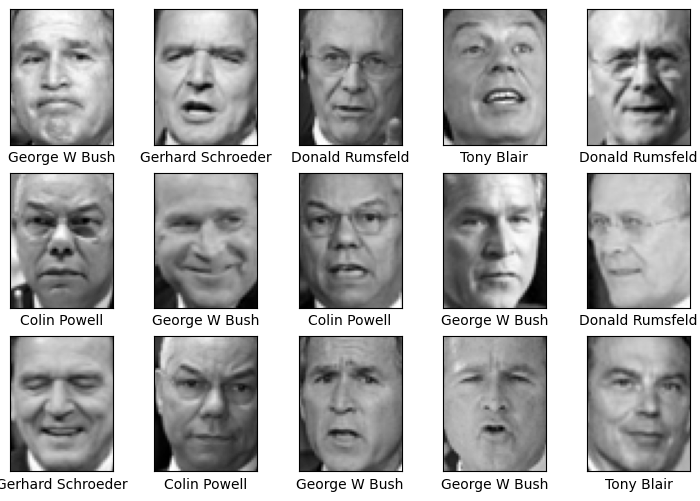

In [35]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

### Step 2: Split the data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, random_state=42
)

### Step 3: Train the SVM model

In [8]:
from sklearn.svm import SVC

model = SVC(class_weight="balanced")
model.fit(X_train, y_train)

SVC(class_weight='balanced')

### Step 4: Testing and Evaluating the predictions of the model

In [9]:
yfit = model.predict(X_test)

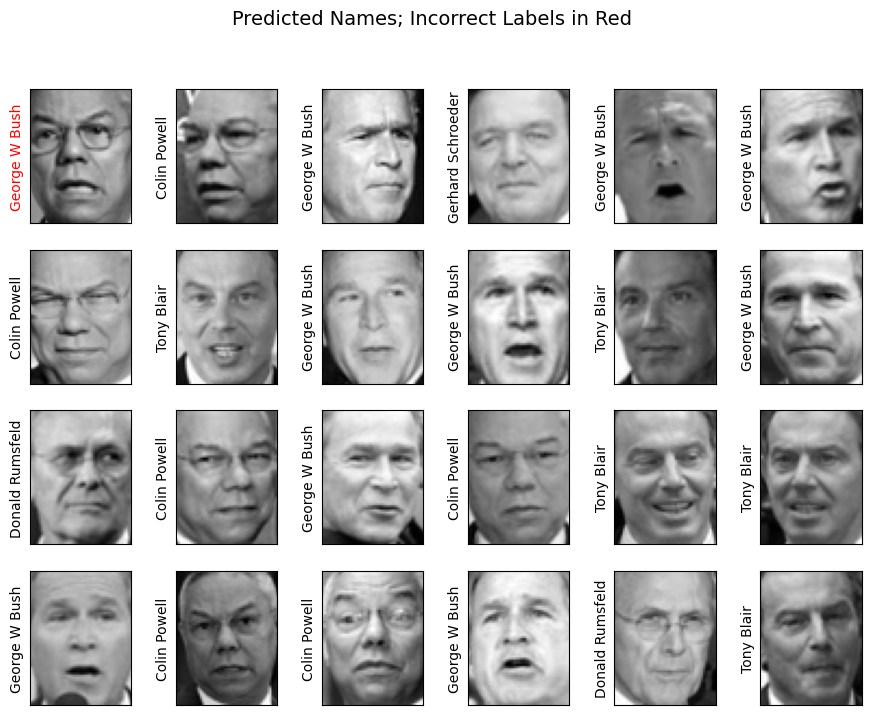

In [10]:
fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11, 8)

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap="gray")
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(
        faces.target_names[yfit[i]], color="black" if yfit[i] == y_test[i] else "red"
    )

fig.suptitle("Predicted Names; Incorrect Labels in Red", size=14)
plt.show()

In [11]:
# Evaluating the model - Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.85      0.86      0.85        64
  Donald Rumsfeld       0.85      0.88      0.86        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.86       285
        macro avg       0.85      0.84      0.84       285
     weighted avg       0.86      0.86      0.86       285



Text(50.72222222222221, 0.5, 'Predicted')

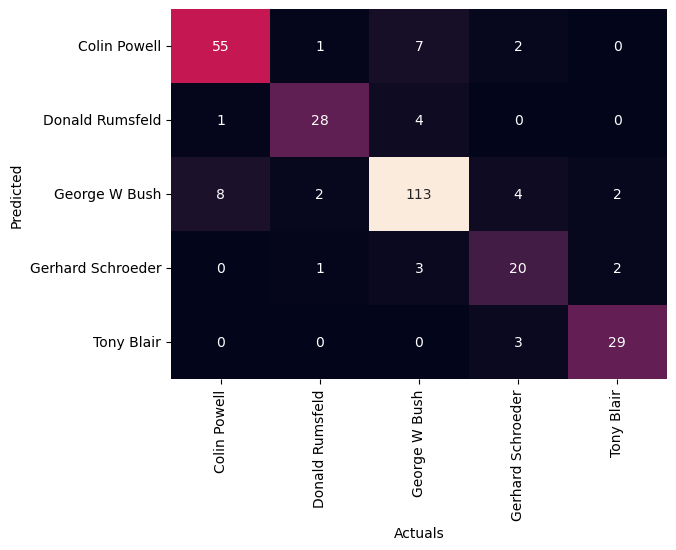

In [12]:
# Let's plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, yfit)

# Plotting the heatmap
sns.heatmap(
    conf_mat.T,
    annot=True,
    fmt="d",
    cbar=False,
    xticklabels=faces.target_names,
    yticklabels=faces.target_names,
)
plt.xlabel("Actuals")
plt.ylabel("Predicted")

This helps us get a sense of which labels are likely to be confused by the estimator.